In [23]:
# === Step 1: Install required dependencies ===
!pip install qrcode pillow


[notice] A new release of pip is available: 24.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
# === Step 2: Import libraries ===
import qrcode
from PIL import Image
from IPython.display import display
import os

In [25]:
# === Step 3: User Inputs (safe for GitHub) ===
website_link = input("Enter the website link: ").strip()

if not website_link.startswith(("http://", "https://")):
    website_link = "https://" + website_link

# Automatically find logo in current project directory
logo_path = os.path.join(os.getcwd(), "Logo.jpg")

print(f"Generating QR code for: {website_link}")

Generating QR code for: https://example.com


In [26]:
# === Step 4: Generate Base QR ===
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,  # High error correction for logo
    box_size=10,
    border=4,
)
qr.add_data(website_link)
qr.make(fit=True)

qr_img = qr.make_image(fill_color="black", back_color="white").convert("RGB")


In [27]:
# === Step 5: Embed Logo in Center ===
try:
    logo = Image.open(logo_path)

    # Resize logo (20% of QR width)
    qr_width, qr_height = qr_img.size
    logo_size = int(qr_width * 0.2)
    logo.thumbnail((logo_size, logo_size))

    # Center position
    pos = ((qr_width - logo.size[0]) // 2, (qr_height - logo.size[1]) // 2)

    # Paste logo (handle transparency)
    qr_img.paste(logo, pos, mask=logo if logo.mode == "RGBA" else None)

except FileNotFoundError:
    print(f"Logo not found at {logo_path}")
except Exception as e:
    print("Error adding logo:", e)


 QR code saved as: qr_with_logo.png


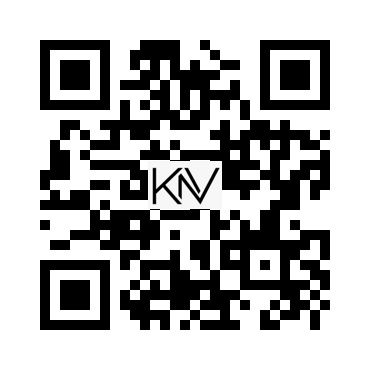

In [28]:
# === Step 6: Save and Display QR ===
output_filename = "qr_with_logo.png"
qr_img.save(output_filename)
print(f" QR code saved as: {output_filename}")

display(qr_img)